# Homework 3

### Due: Sunday Oct 3, at 11:59pm via Blackboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Problem 1: Peformance of Large vs. Small Companies

Companies vary greatly in size. This variation can hide how well a company is performing. Rather than looking at the raw profit numbers, analysts consider financial ratios that adjust for the size of the company. A popular ratio is the return on assets, defined as:

**Return on Assets $= Net Income/Total Assets$**

Net income is another name for profits, and the total assets of a company is the value of everything it owns that is used to produce profits. The return on assets indicates how much profit the company generates relative to the amount that it invested to make that profit. A company with losses rather than profits has a negative return on assets. 

**Data:** The data set `Company.csv` gives the company name, total assets (in Millions \$), net income (in Millions \$), and the number of employees reported by 167 retailers in the United States. 

In the following questions, you will be performing an **exploratory data analysis (EDA)** for the given companies data. 

### 1.1. (2 points) Compute and report (in a short paragraph of text) the following summary statistics for the `Net Income (M\$)` data (round your values to the nearest integer):

    - Mean
    - Median
    - Standard Deviation
    - Range
    - IQR 

In [2]:
company = pd.read_csv('Company.csv')
net_income = company['Net Income (M$)']
net_income.describe().round()

count      167.0
mean       334.0
std       1385.0
min      -1510.0
25%          2.0
50%         34.0
75%        191.0
max      16389.0
Name: Net Income (M$), dtype: float64

In [3]:
print(f'mean: {round(net_income.mean())}')
print(f'median: {round(net_income.median())}')
print(f'standard deviation: {round(net_income.std())}')
print(f'range: {round(net_income.max()-net_income.min())}')
print(f'IQR: {round(net_income.quantile(.75)-net_income.quantile(.25))}')

mean: 334
median: 34
standard deviation: 1385
range: 17899
IQR: 188


The mean of net income among these 167 companies is 334 million dollars while the median is only 34 million. The values vary a lot with range of 17899 and standard deviation of 1385. The IQR of the dataset is 188.

### 1.2. (2 points) Report the % of companies that inccured losses. For this question, you are expected to add a new categorical variable to the dataset (call it `Profit`) with two levels: `PROFIT` if the net income is above zero (net income >= 0) and `LOSS` if the net income is below zero (net income < 0). 



In [4]:
Profit = ['PROFIT' if i >= 0 else 'LOSS' for i in net_income.tolist()]
company['Profit'] = Profit
company['Profit'].value_counts(normalize=True)*100

PROFIT    76.646707
LOSS      23.353293
Name: Profit, dtype: float64

About 23.4% companies suffered losses.

### 1.3. (2 points) What is the shape of the distribution of the variable `Net Income (M$)`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier net income.

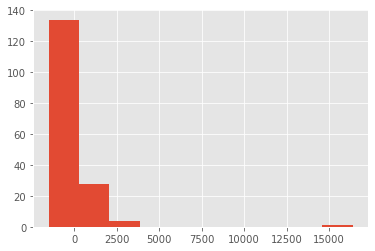

In [5]:
plt.hist(net_income)
plt.show()

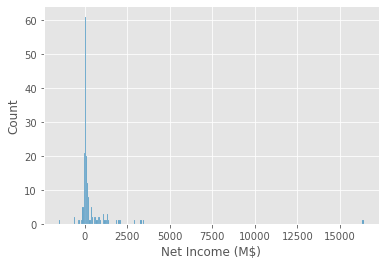

In [6]:
sns.histplot(net_income)
plt.show()

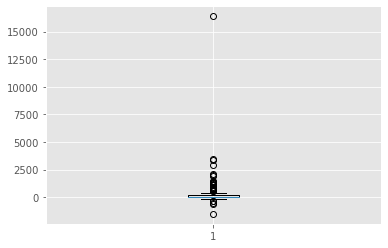

In [7]:
plt.boxplot(net_income)
plt.show()

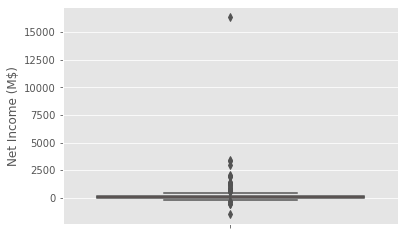

In [8]:
sns.boxplot(data = company, y= 'Net Income (M$)')
plt.show()

The distribution is right-skewed, and there are some companies with an outlier net income.

### 1.4. (2 points) A company that has more than 5000 employees is considered a large one, otherwise it is cosidered small. Create a new categroical variable (call it `Company Size`) with two levels: `LARGE` if the number of employees is greater than 5000 (employees > 5000), and `SMALL` otherwise (employees <=5000). What is the % of large and small companies in the dataset?

In [9]:
size = ['LARGE' if i > 5000 else 'SMALL' for i in company['# Employees'].tolist()]
company['Company Size'] = size
company['Company Size'].value_counts(normalize=True)*100

LARGE    68.862275
SMALL    31.137725
Name: Company Size, dtype: float64

In the dataset, 68.9% of the companies are large ones and 31.1% are small ones.

### 1.5. (2 points) Create a side-by-side boxplot to compare the distribtution of `Net Income (M$)` for both Large and Small companies. What does this graph tell you about the net income for both types of companies?

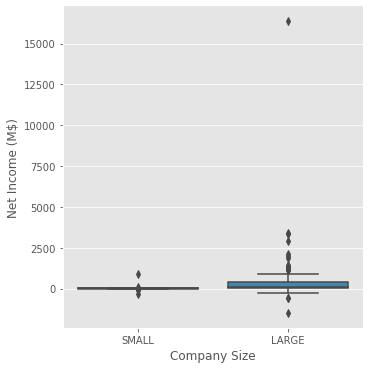

In [10]:
sns.catplot(x = 'Company Size', y = 'Net Income (M$)', kind = 'box', data = company)

Although the range of net income of large companies is larger than that of small ones, it seems that large companies tend to have a higher net income than small companies because their values of Q1, Q2, and Q3 are higher than small ones'.

### 1.6. (3 points) A better way to assess the performance of companies is to look at their `Return on Assets` instead of looking only at net income. The return on assets indicates how much profit the company generates relative to the amount that it invested to make profits. 

- Create a new numerical variable (call it `Return on Assets`) based on the formula: **Return on Assets = Net Income/Total Assets**. 

- What is the shape of the distribution of the variable `Return on Assets`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier return on assets value.

- Create a side-by-side boxplot to compare the distribtution of `Return on Assets` for both Large and Small companies. What does this graph tell you about the return on assets for both types of companies?

In [11]:
company['Return on Assets'] = company['Net Income (M$)']/company['Total Assets (M$)']

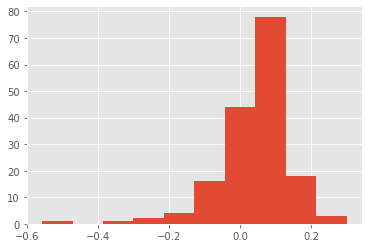

In [12]:
plt.hist(company['Return on Assets'])
plt.show()

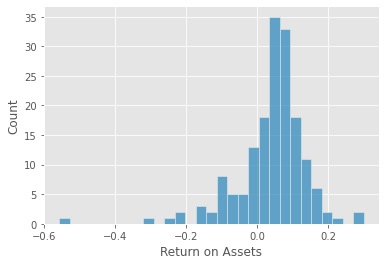

In [13]:
sns.histplot(company['Return on Assets'])
plt.show()

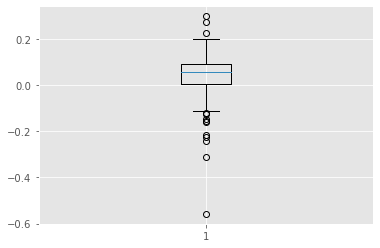

In [14]:
plt.boxplot(company['Return on Assets'])
plt.show()

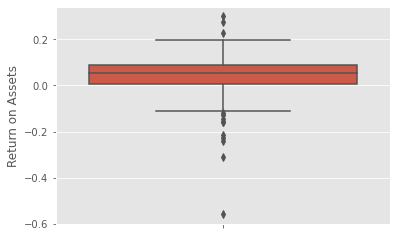

In [15]:
sns.boxplot(data = company, y= 'Return on Assets')
plt.show()

The distribution is left-skewed, and there are companies with an outlier return on assets value (more than 0.2 and less than -0.1).

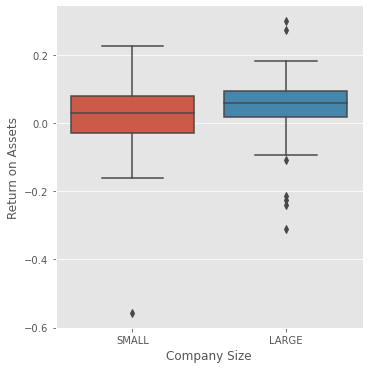

In [16]:
sns.catplot(x = 'Company Size', y = 'Return on Assets', kind = 'box', data = company)
plt.show()

The return on assets of large companies has a larger range but with higher Q1, Q2, and Q3. Although the large companies have more outliers with values less than the reasonable range, it seems that most large companies have more return on assets than small ones.

### 1.7. (1 point) Which company has the least return on assets?

In [17]:
company[company['Return on Assets'] == company['Return on Assets'].min()]['Company Name']

123    SCHOOL SPECIALTY INC
Name: Company Name, dtype: object

School Specialty Inc. has the least return on assets.

## Problem 2: Data Analytics Jobs in the USA

Soon you will start getting ready to explore the job market for data analyst/data scientist positions (internship and full time). In this case study, we will assess the job market in the USA, and in particular, we are interested to learn which business sectors and companies are looking to hire data analysts in different US states. This should get you started with your internship search for Summer 2022.

The data set (`DataAnalyst.csv`) is available for download from blackboard. It is scrapped and cleaned from GlassDoor using this [web scrapper](https://github.com/picklesueat/data_jobs_data/blob/master/glass_scraper.py). We will learn how to scrap data from the web in the second half of the semester.

The dataset has a sample of 2,253 job listings. The following table describes some of the variables necessary to answer the questions in this quiz:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Job Title`| listing's job title
|`Job Description`| listing's job description
|`Rating`| the company's rating on Glassdoor
|`Company Name` | the listing company's name
|`City` | city location of the company 
|`State`| state location of the company
|`Size` | number of employees in the company 
|`Founded`| the year the company was founded
|`Type of ownership`| is the company private, public, non-profit, etc.?
|`Industry`| primary business activity 
|`Sector`| economic sector classification for the company
|`Revenue`| company's income generated from business operations
|`Competitors`| the company's list of competitors
|`Min_Salary`| the minimum salary listing for the position
|`Max_Salary`| the maximum salary listing for the position

**In this homework, we assume that the sample of 2,253 job listings is a representative of the population of job listings in the USA.**

### 2.1 (1 point) What are the top 4 sectors with the highest count of job listings?

In [20]:
jobs = pd.read_csv('DataAnalyst.csv')
jobs.Sector.value_counts().head(4)

Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Name: Sector, dtype: int64

The top 4 sectors with the highest count of job listings are Information Technology, Business Services, Finance, Health Care.

### 2.2. (1 point) Suppose that you want to focus your job search in the following sectors (Information Technology, Business Services, Finance,  Health Care). Create a subset of the given dataset that include only these 4 sectors with their data (include all variables).

*Name the subset dataframe `mydata`.*

In [21]:
mydata = jobs[jobs['Sector'].isin(['Information Technology','Business Services', 'Finance', 'Health Care'])].copy() 
mydata

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,New York,NY,1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66
6,Business/Data Analyst (FP&A),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,New York,NY,1001 to 5000 employees,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,Marketing/Communications - Data Analyst-Marketing,Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.,Broomfield,CO,51 to 200 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),NaN,78,104
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.",Denver,CO,51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,78,104
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,Centennial,CO,10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",78,104
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,Centennial,CO,201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,78,104


### 2.3 (2 points) You are given the range of salary for each job listing (minimum and maximum salary). Add a new variable to `mydata` to estimate the salary of the for each of the listing in the dataset. The estimate salary is the average of the given minimum and maximum salary.

*Name the the new column `Est_Salary`.*

What is the **average**, and **standard deviation** for the estimated salary among the 4 sectors listed in `mydata` dataframe?

In [22]:
mydata['Est_Salary'] = (mydata['Max_Salary'] + mydata['Min_Salary'])/2
print(mydata.groupby(mydata['Sector']).Est_Salary.describe())

                        count       mean        std   min    25%   50%   75%  \
Sector                                                                         
Business Services       524.0  72.135496  22.411196   0.0  59.50  68.5  80.5   
Finance                 169.0  67.644970  22.545747  33.5  53.00  63.5  76.0   
Health Care             151.0  72.807947  26.554150  33.5  53.75  68.0  87.0   
Information Technology  570.0  74.247368  25.520887  33.5  59.00  70.0  85.0   

                          max  
Sector                         
Business Services       150.0  
Finance                 138.5  
Health Care             150.0  
Information Technology  150.0  


Business Service: average 72.1, standard deviation 22.4
Finance: average 67.6, standard deviation 22.5
Health Care: average 72.8, standard deviation 26.6
Information Technology: average 74.2, standard deviation 25.5

### 2.4 (2 points) Create a side-by-side boxplot to show the distribution of salaries among the four hiring sectors (listed in `mydata`). What does the boxplot tell you about the salaries in these industries for data analysts?

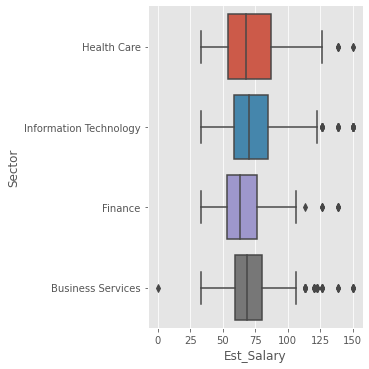

In [23]:
sns.catplot(x = 'Est_Salary', y = 'Sector', kind = 'box', data = mydata)
plt.show()

The distribution of salaries are right-skewed. The median of salaries of Finance is relatively less than other industries. The IQR of Health Care is the largest. All of these sector have outliers and it seems that Business Service has the most. It is difficult to conclude which sector has the highest salaries just based on the graph.

### 2.5 (2 points) List the company names (distinct) in the **Information Technology** sector has job postings with estimated salaries above 100K dollars?

In [24]:
mydata_it = mydata[mydata['Sector'] == 'Information Technology']
mydata_it_high = mydata_it[mydata_it['Est_Salary'] > 100]
company_high = pd.Series(mydata_it_high['Company Name'].unique())
print(company_high)

0                               Criteo
1                      Tekfortune Inc.
2     Staffigo Technical Services, LLC
3     8K Miles Software Services, Inc.
4                                  VTS
5             RMS Computer Corporation
6          Reliable Software Resources
7                               Oracle
8           Avani Technology Solutions
9                            Primesoft
10                       Systemart LLC
11                        TechProjects
12     Information Technology Partners
13                              TikTok
14          Synchronous Solutions, Inc
15                          HR Pundits
16                 Softpath System LLC
17                  Motorola Solutions
18                           Capgemini
19                              NVIDIA
20     Risk Management Solutions (RMS)
21                            LeanData
22                             Alteryx
23                        L&T Infotech
24                           IntraEdge
25                       

### 2.6 (3 points) Use the dataset with the 4 sectors (`mydata`) to create a dot plot (lollipop plot) that shows the top 15 states with the highest average salaries.

*Name the dataframe `top15states`*

*The resulting dataframe should have two columns (`State`, `Avg Salary`), where `Avg Salary` is the mean salary in the corresponding `State`*

*Use two different colors of your choice to distingusih between the states with avegrage salary larger than \$75K and thos with average salary less than \$75K.* 

In [25]:
state = mydata.groupby(mydata['State']).Est_Salary.mean()
df_state = state.reset_index()

In [26]:
top15states_i = df_state.sort_values(by = 'Est_Salary', ascending = False).head(15)
top15state = top15states_i.rename(columns = {'Est_Salary':'Avg Salary'})
top15state

,State,Avg Salary
1,CA,90.986595
6,IL,78.027778
10,NJ,73.925000
2,CO,73.100000
11,NY,71.856195
0,AZ,70.771186
14,SC,70.250000
9,NC,67.849206
17,VA,65.074074
18,WA,62.545455


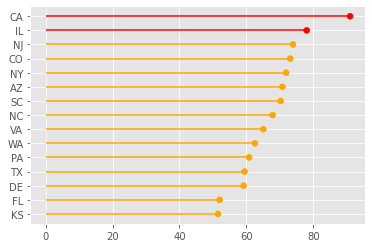

In [27]:
ordered = top15state.sort_values(by='Avg Salary')
my_range=range(0,len(top15state.index))
my_color = np.where(ordered['Avg Salary'] > 75, 'red', 'orange')

plt.hlines(y=ordered['State'], xmin=0, xmax=ordered['Avg Salary'], color=my_color)
plt.scatter(ordered['Avg Salary'], my_range, color=my_color)

plt.show()